In [1]:
import csv

In [2]:
tweets = "/datasets/sagarj/water_scarcity/Hackweek_raw_data.csv"

In [3]:
records = []
with open(tweets, 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        records.append(row)
print records[0]
print len(records)

['', 'Query Id', 'Query Name', 'Date', 'Domain', 'Sentiment', 'Page Type', 'Language', 'Country Code', 'Continent Code', 'Continent', 'Country', 'State Code', 'County Code', 'City Code', 'Notes', 'Account Type', 'Assignment', 'Author City', 'Author City Code', 'Author Continent', 'Author Continent Code', 'Author Country', 'Author Country Code', 'Author County', 'Author County Code', 'Author Location', 'Author State', 'Author State Code', 'Avatar', 'Average Pages per Visitor', 'Average Visits per Visitor', 'Backlinks', 'Blog Comments', 'Category Details', 'Checked', 'City', 'County', 'Editorial Value (EUR)', 'Editorial Value GBP', 'Editorial Value USD', 'Engagement Score', 'Facebook Author ID', 'Facebook Comments', 'Facebook Likes', 'Facebook Role', 'Facebook Shares', 'Facebook Subtype', 'Forum Posts', 'Forum Views', 'Gender', 'Impact', 'Impressions', 'Instagram Comments', 'Instagram Followers', 'Instagram Following', 'Instagram Likes', 'Instagram Posts', 'Interest', 'Kred Influence', '

In [4]:
print records[1]
title = records[0]
records = records[1:]

['118533', '1998545585', 'HackWeek', '2013-08-0100:02:37.0', 'twitter.com', 'neutral', 'twitter', 'en', 'us', 'n-a', 'North America', 'United States', 'mis9', '', '', '', 'individual', '', '', '', '', '', '', '', '', '', '', '', '', 'https://si0.twimg.com/profile_images/378800000168695790/d81e655616b76c3c694ecb999a8a7d58_normal.jpeg', '22', '6', '49850734', '0', '{id=2433798, name=Retweet, parentName=Mention Type, parentId=2433797}', 'False', '', '', '0', '0', '0', '0.0', '', '0', '0', '', '0', '', '0', '0', 'unknown', '50', '431', '0', '0', '0', '0', '0', 'Sports, Food & Drinks', '749', '7', '', '0.0', '', '0.0', '', 'Retweet', '20', '46', '54', '', 'Student (Freshman)', '739', '17850056979', 'False', 'Missouri', '', 'Retweet', '', 'share', '17849592340', '', '6000000000', '0', '', '', '497', '198', '', '0', '0', '10651', 'False', '', '9.6']


In [5]:
usRecords = []
for record in records:
    if record[8] == 'us' and record[11] == 'United States':
        usRecords.append(record)
print len(usRecords)

3229678


In [6]:
print usRecords[100]

['118431', '1998545585', 'HackWeek', '2013-08-0105:50:57.0', 'twitter.com', 'neutral', 'twitter', 'en', 'us', 'n-a', 'North America', 'United States', '', '', '', '', 'individual', '', '', '', '', '', '', '', '', '', '', '', '', 'https://si0.twimg.com/profile_images/378800000222752029/1915a7c74fc6daa131659aa2eddc3ba8_normal.jpeg', '22', '6', '49850734', '0', '{id=2433798, name=Retweet, parentName=Mention Type, parentId=2433797}', 'False', '', '', '0', '0', '0', '0.0', '', '0', '0', '', '0', '', '0', '0', 'unknown', '24', '745', '0', '0', '0', '0', '0', 'Family & Parenting', '574', '0', '', '0.0', '', '0.0', '', 'Retweet', '20', '46', '54', '', '', '0', '17856253377', 'False', '', '', 'Retweet', '', 'share', '17856222046', '', '6000000000', '0', '', '', '703', '591', '', '0', '0', '52148', 'False', '', '9.6']


In [7]:
import numpy as np


In [8]:
TitleMap = {}
for i in range(len(title)):
    TitleMap[title[i]] = i
print TitleMap


{'': 0, 'Checked': 35, 'Twitter Following': 87, 'Page Type': 6, 'Engagement Score': 41, 'City Code': 14, 'Percentage Male': 69, 'Twitter Hashtags': 88, 'Author Continent Code': 21, 'Average Pages per Visitor': 30, 'Notes': 15, 'Longitude': 64, 'Author State Code': 28, 'Author Location': 26, 'Starred': 74, 'Minutes per Visitor': 67, 'Thread URL': 81, 'Kred Outreach': 60, 'Facebook Shares': 46, 'Impact': 51, 'Continent Code': 9, 'Instagram Posts': 57, 'Total Monthly Visitors': 82, 'Instagram Followers': 54, 'Instagram Comments': 53, 'Priority': 70, 'State': 75, 'Interest': 58, 'Latitude': 62, 'Facebook Subtype': 47, 'Account Type': 16, 'Instagram Following': 55, 'Instagram Likes': 56, 'Twitter Verified': 92, 'Author City Code': 19, 'Query Name': 2, 'Average Visits per Visitor': 31, 'Professions': 71, 'State Code': 12, 'Author State': 27, 'Category Details': 34, 'Author Continent': 20, 'Last Assignment Date': 61, 'Forum Views': 49, 'Twitter Reply Count': 89, 'Facebook Role': 45, 'County C

In [9]:
locUSRecords = []
for record in usRecords:
    if (float(record[int(TitleMap['Latitude'])]) > -90.0 and float(record[int(TitleMap['Latitude'])]) < +90.0):
        if (float(record[int(TitleMap['Latitude'])]) == 0.0 and float(record[int(TitleMap['Longitude'])]) == 0.0 ):
            continue
        else:
            locUSRecords.append(record)
print len(locUSRecords)

58628


In [13]:
import matplotlib.dates as mdates


CAtweets = []
for tweet in usRecords:
    if (tweet[TitleMap['State']] == 'California'):
        CAtweets.append(tweet)
print len(CAtweets)

400549


In [45]:
droughtTweetCount = "/work/sagarj/Work/scpDir/calDro_all.csv"
tweetCount = []
with open(droughtTweetCount, 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        tweetCount.append(row)


In [40]:
print tweetCount[0]

print len(tweetCount)

[]


In [20]:
CAtweet_count = np.zeros(29)


In [21]:
import numpy
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [22]:
# sortedRecords = []
# with open("/work/sagarj/Work/scpDir/CaliforniaANDdroughtTwitter.csv", 'rb') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         sortedRecords.append(row)

# title = sortedRecords[0]
# TitleMap = {}
# for i in range(len(title)):
#     TitleMap[title[i]] = i
# print TitleMap
# locUSRecords = sortedRecords[1:]

In [23]:
data = numpy.zeros((len(locUSRecords),9))
reach = numpy.zeros(len(locUSRecords))
print TitleMap['Reach']

72


In [24]:
for i in range(len(locUSRecords)):
    data[i][0] = float(locUSRecords[i][int(TitleMap['Latitude']) ])
    data[i][1] = float(locUSRecords[i][int(TitleMap['Longitude']) ])
    data[i][2] = float(locUSRecords[i][int(TitleMap['Twitter Following']) ])
    data[i][3] = float(locUSRecords[i][int(TitleMap['Twitter Followers']) ])
    data[i][4] = float(locUSRecords[i][int(TitleMap['Twitter Tweets']) ])
    data[i][5] = float(locUSRecords[i][int(TitleMap['Impressions']) ])
    data[i][6] = float(locUSRecords[i][int(TitleMap['Percentage Female']) ])
    data[i][7] = float(locUSRecords[i][int(TitleMap['Percentage Male']) ])
    data[i][8] = float(locUSRecords[i][int(TitleMap['Average Visits per Visitor']) ])
    
    reach[i] = locUSRecords[i][int(TitleMap['Reach']) ]
    #print locUSRecords[i][int(TitleMap['Reach'])]

In [25]:
print data.shape
print reach.shape

print np.amax(reach , axis = 0)

(58628, 9)
(58628,)
181041.0


In [26]:
labels = numpy.zeros(len(reach))
for i in range(reach.shape[0]):
    labels[i] = int(reach[i]/3000)
print labels.shape

(58628,)


In [27]:
print np.amax(labels , axis = 0)

60.0


In [28]:
trainData = data[:50000]
trainReach = labels[:50000]
testData = data[50000:]
testReach = labels[50000:]

In [29]:
clf = GaussianNB()
clf.fit(trainData, trainReach)

GaussianNB()

In [30]:
bayesian_predict = clf.predict(testData)
print bayesian_predict.shape

(8628,)


In [31]:
error_bayesian = mean_squared_error(testReach, bayesian_predict)
print error_bayesian

0.454102920723


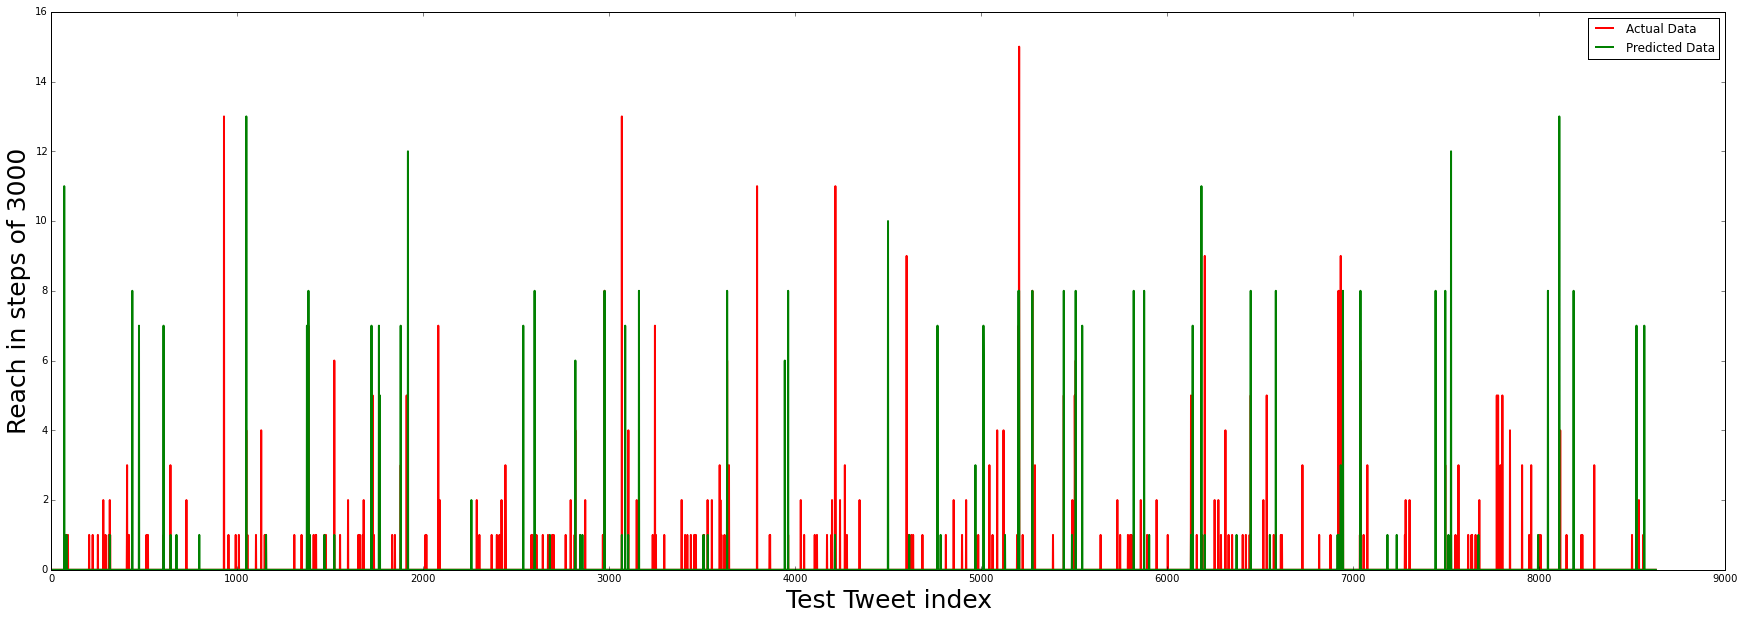

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
x = np.arange(0,testReach.shape[0],1)
plt.plot(x, testReach, 'r', x, bayesian_predict ,'g' , linewidth=2.0)
plt.ylabel('Reach in steps of 3000',fontsize = 25)
plt.xlabel('Test Tweet index', fontsize = 25)
plt.legend(['Actual Data' , 'Predicted Data'])

0.250811312007


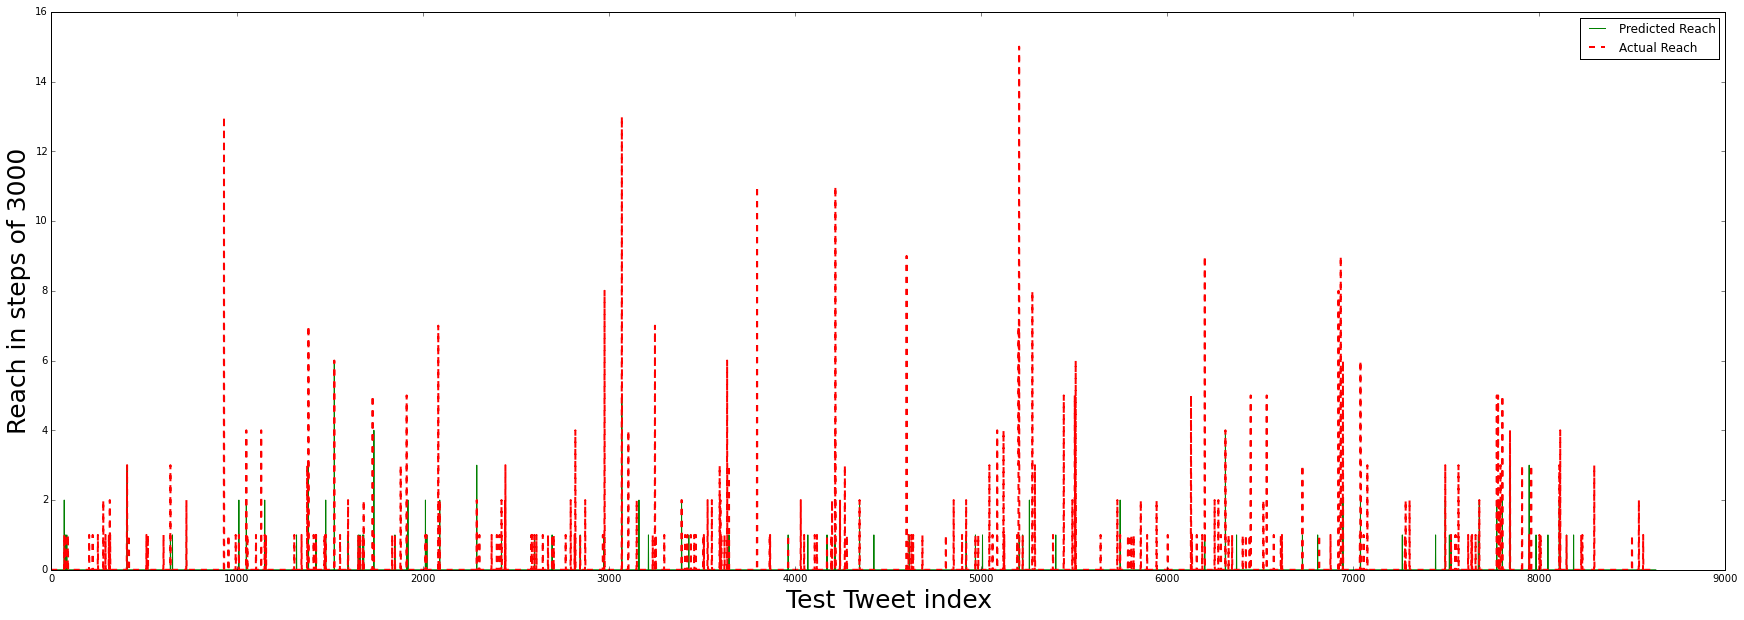

In [33]:
clfRF = RandomForestClassifier(n_estimators=9)
clfRF.fit(trainData, trainReach)
RF_predict = clfRF.predict(testData)
x = np.arange(0,RF_predict.shape[0],1)
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
plt.plot(x, RF_predict ,'g' , linewidth=1.0)
plt.plot(x, testReach ,'r--' , linewidth=2.0)
plt.ylabel('Reach in steps of 3000',fontsize = 25)
plt.xlabel('Test Tweet index', fontsize = 25)
plt.legend(['Predicted Reach' , 'Actual Reach'])
error_RF = mean_squared_error(testReach, RF_predict)
print error_RF
# scores = cross_val_score(clfRF, testData, testReach)
# print scores

In [34]:
print clfRF.feature_importances_
print clfRF.n_features_

[ 0.10352593  0.1065686   0.11254735  0.16681531  0.1063083   0.40423451
  0.          0.          0.        ]
9


In [35]:
np.sum(clfRF.feature_importances_)

0.99999999999999989

In [36]:
mean_test = np.mean(testData , axis = 0)

In [37]:
print mean_test

[  3.68161915e+01  -1.01009418e+02   1.43391400e+03   2.88266586e+03
   2.85833570e+04   5.16869054e+03   4.60000000e+01   5.40000000e+01
   6.00000000e+00]


In [38]:
lat_test = np.repeat(mean_test.reshape(1,9), 1000, axis=0)

In [ ]:
print lat_test.shape

In [ ]:
#lat_test[0][0] = 29.0
for i in range(1,len(lat_test)):
    lat_test[i][5] = lat_test[i-1][5] + 1


In [ ]:
RF_predict = clfRF.predict(lat_test)


In [ ]:
x = lat_test[:,0]
print x.shape
print RF_predict.shape
#print lat_test[:,0]
print RF_predict
#plt.plot(x, RF_predict, 'r', linewidth=2.0)